In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



# Load Data

In [7]:

DATA_PATH = '../data/TAS_Airport_Data_2024_balanced.csv' #
df_raw = pd.read_csv(DATA_PATH)

print("--- Raw Data Info ---")
df_raw.info()
print("\n--- Raw Data Head ---")
print(df_raw.head())
print("\n--- Raw Data Description (Numerical) ---")
print(df_raw.describe(include=np.number))
print("\n--- Raw Data Description (Object/Categorical) ---")
print(df_raw.describe(include='object'))



--- Raw Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32940 entries, 0 to 32939
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   FlightID                32940 non-null  object
 1   Airline                 32940 non-null  object
 2   DepartureAirport        16470 non-null  object
 3   ArrivalAirport          16470 non-null  object
 4   OriginAirport           16470 non-null  object
 5   Gate                    32940 non-null  object
 6   ScheduledTime           16470 non-null  object
 7   ScheduledArrivalTime    16470 non-null  object
 8   FlightDuration          32940 non-null  int64 
 9   BaggageHandlers         32940 non-null  int64 
 10  GroundCrew              32940 non-null  int64 
 11  FuelTrucks              32940 non-null  int64 
 12  CleaningCrew            32940 non-null  int64 
 13  Passengers              32940 non-null  int64 
 14  AircraftType            32940 no

# Initial Data Cleaning & Understanding

In [8]:
# Create a copy for cleaning
df = df_raw.copy()

# Column Names (check for leading/trailing spaces)
df.columns = df.columns.str.strip()
print("\n--- Cleaned Column Names ---")
print(df.columns.tolist())

# Missing Values Analysis
print("\n--- Missing Value Counts ---")
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0].sort_values(ascending=False))

# Percentage of Missing Values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\n--- Missing Value Percentages ---")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# Duplicate Records
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate records: {num_duplicates}")
# df.drop_duplicates(inplace=True) # Decide if you want to drop them globally here



--- Cleaned Column Names ---
['FlightID', 'Airline', 'DepartureAirport', 'ArrivalAirport', 'OriginAirport', 'Gate', 'ScheduledTime', 'ScheduledArrivalTime', 'FlightDuration', 'BaggageHandlers', 'GroundCrew', 'FuelTrucks', 'CleaningCrew', 'Passengers', 'AircraftType', 'SecurityChecks', 'WeatherCondition', 'RunwayDelay', 'DepartureDelay', 'ArrivalDelay', 'ReasonForDelay', 'PreviousFlightDelay', 'GateAvailability', 'GateType', 'AircraftTurnaroundTime', 'CheckInQueueTime', 'SecurityWaitTime', 'LoungeUsage', 'OnTimePerformance', 'BaggageClaimBelts', 'CustomsOfficers', 'ImmigrationOfficers']

--- Missing Value Counts ---
DepartureAirport        16470
ArrivalAirport          16470
OriginAirport           16470
ScheduledTime           16470
ScheduledArrivalTime    16470
ReasonForDelay          10497
dtype: int64

--- Missing Value Percentages ---
DepartureAirport        50.000000
ArrivalAirport          50.000000
OriginAirport           50.000000
ScheduledTime           50.000000
ScheduledArr

# Datetime Conversion

In [9]:
datetime_cols = ['ScheduledTime', 'ScheduledArrivalTime']
for col in datetime_cols:
    if col in df.columns:
        print(f"\nConverting column: {col} to datetime")
        # Attempt to infer format, or specify if known
        df[col] = pd.to_datetime(df[col], errors='coerce') # 'coerce' will turn unparseable to NaT
        print(f"Nulls in {col} after conversion: {df[col].isnull().sum()}")
    else:
        print(f"Warning: Datetime column '{col}' not found in DataFrame.")

df.info() # Check dtypes again




Converting column: ScheduledTime to datetime
Nulls in ScheduledTime after conversion: 16470

Converting column: ScheduledArrivalTime to datetime
Nulls in ScheduledArrivalTime after conversion: 16470
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32940 entries, 0 to 32939
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   FlightID                32940 non-null  object        
 1   Airline                 32940 non-null  object        
 2   DepartureAirport        16470 non-null  object        
 3   ArrivalAirport          16470 non-null  object        
 4   OriginAirport           16470 non-null  object        
 5   Gate                    32940 non-null  object        
 6   ScheduledTime           16470 non-null  datetime64[ns]
 7   ScheduledArrivalTime    16470 non-null  datetime64[ns]
 8   FlightDuration          32940 non-null  int64         
 9   BaggageHandlers         32

# Initial Feature Exploration

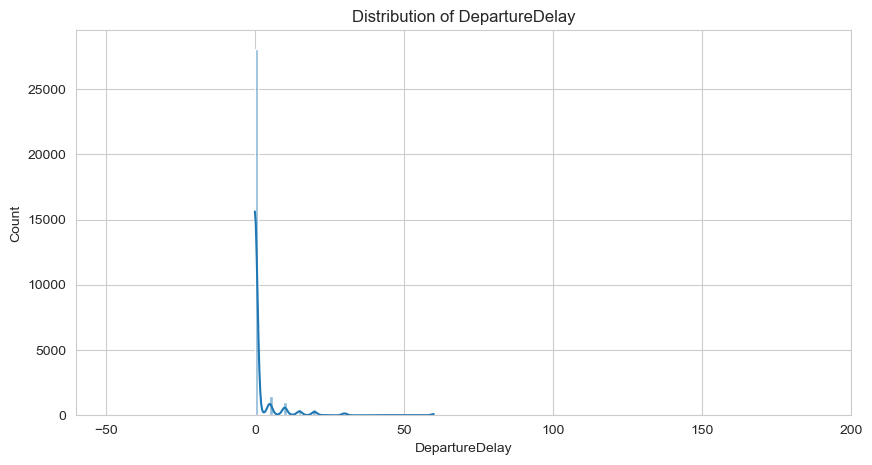

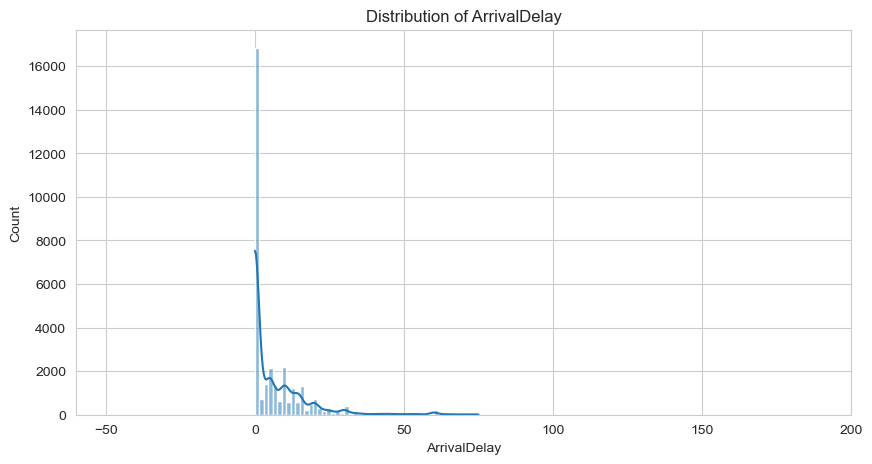

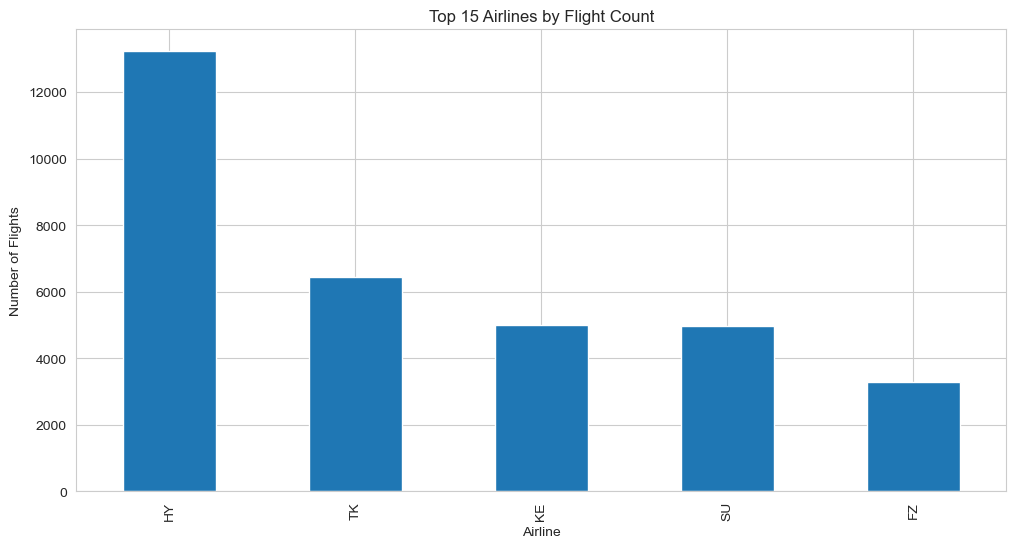

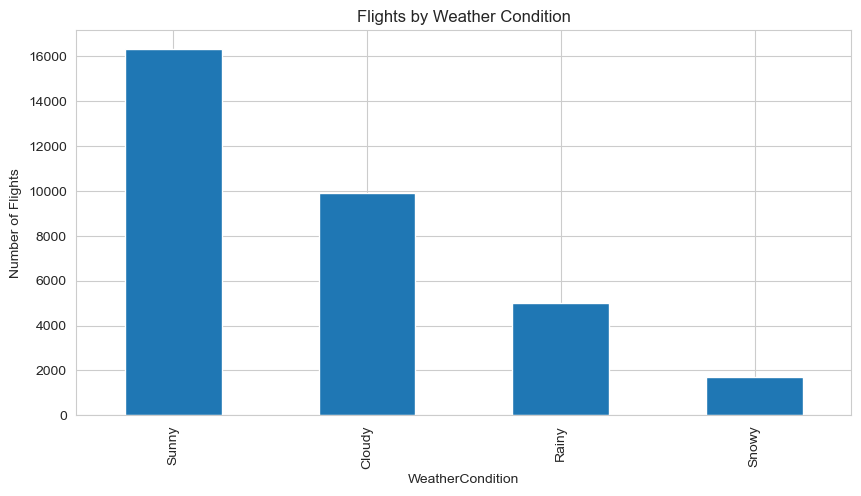

In [10]:

# Target Variable Distributions 
if 'DepartureDelay' in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df['DepartureDelay'].dropna(), kde=True, bins=50)
    plt.title('Distribution of DepartureDelay')
    plt.xlim(-60, 200) # Zoom in on a reasonable range
    plt.show()

if 'ArrivalDelay' in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df['ArrivalDelay'].dropna(), kde=True, bins=50)
    plt.title('Distribution of ArrivalDelay')
    plt.xlim(-60, 200)
    plt.show()

# Categorical Feature Counts 
if 'Airline' in df.columns:
    plt.figure(figsize=(12,6))
    df['Airline'].value_counts().nlargest(15).plot(kind='bar')
    plt.title('Top 15 Airlines by Flight Count')
    plt.ylabel('Number of Flights')
    plt.show()

if 'WeatherCondition' in df.columns:
    plt.figure(figsize=(10,5))
    df['WeatherCondition'].value_counts().plot(kind='bar')
    plt.title('Flights by Weather Condition')
    plt.ylabel('Number of Flights')
    plt.show()


df.to_csv('../data/TAS_Airport_Data_2024_cleaned_exploratory.csv', index=False)


